In [1]:
import pandas as pd
import numpy as np

### link to dataset decsription
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6710633/
- Data was initially collected annonymously through an online survey in Mexico, Peru and Colombia. Data from the survey was unbalanced, so reasearched used the tool WEKA and the filter SMOTE to preoduce synthetic data to balance out the target varaible. The data imported here has been cleaned and is mostly synthetic.

In [69]:
data = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')
data.columns = ['gender', 'age', 'height', 'weight', 'overweight_history',
       'high_caloric_food', 'vegitables', 'num_meals', 'snacks', 'smoke', 'water', 'monitor_cals', 'activity',
        'screen_time','alcohol', 'transportation', 'obesity_level']
data.head()

,gender,age,height,weight,overweight_history,high_caloric_food,vegitables,num_meals,snacks,smoke,water,monitor_cals,activity,screen_time,alcohol,transportation,obesity_level
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [3]:
data.describe()

,age,height,weight,vegitables,num_meals,water,activity,screen_time
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [43]:
for i in data.select_dtypes(exclude='float').columns:
    print(i + ':            ', list(np.unique(data[[i]])))

gender:             ['Female', 'Male']
overweight_history:             ['no', 'yes']
high_caloric_food:             ['no', 'yes']
snacks:             ['Always', 'Frequently', 'Sometimes', 'no']
smoke:             ['no', 'yes']
monitor_cals:             ['no', 'yes']
alcohol:             ['Always', 'Frequently', 'Sometimes', 'no']
transportation:             ['Automobile', 'Bike', 'Motorbike', 'Public_Transportation', 'Walking']
obesity_level:             ['Insufficient_Weight', 'Normal_Weight', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III', 'Overweight_Level_I', 'Overweight_Level_II']


### Data Description

| Variable     | Description | Data Type |
| ----------- | ----------- | ----------- |
| gender      | Male or Female     | str |
| age   | in years     | float |
| height   | in meters    | float |
| weight | in kilograms | float |
| overweight_history   | overweight family history, yes or no | str |
| high_caloric_food   | eats high caloric food, yes or no | str |
| vegitables | eats vegitables with meals, 3 options | float |
| num_meals | main meals per day, 3 options | float |
| snacks | eats snacks between meals, 4 options | str |
| smoke | smoker, yes or no | str |
| water | daily water intake, 3 options | float |
| monitors_cals | monitors calories daily, yes or no | str |
| activity | physical activity frequency, 4 options | float |
| screen_time | screen time use per day, 3 options | float |
| alcohol | alcohol intake frequency, 4 options | str |
| transportation | most frequent method of transportation, 5 options | str |
| obesity_level | 7 options | str |

### Feature Engineering
columns to map: gender, overweight_history, high_caloric_food, snacks, smoke, monitor_cals, alcohol, obesity

columns to dummify: transportation

columns to map are variables with catagorical answers that can be mapped to a scale, transportation needs dummy variables because you cannot say taking public transpotation is more similar to driving a car than riding a motorbike.

In [70]:
#mapping
yesno_map = {'yes':1, 'no':0}
yesno_cols = ['overweight_history', 'high_caloric_food', 'smoke', 'monitor_cals']

yesno_mapped = data[yesno_cols].stack().map(yesno_map).unstack()
data[yesno_cols] = yesno_mapped

gender_map = {'Female':1, 'Male':0}
data.gender = data.gender.map( gender_map )

frequency_map = {'Always':3, 'Frequently':2, 'Sometimes':1, 'no':0}
data.snacks = data.snacks.map( frequency_map )
data.alcohol = data.alcohol.map( frequency_map )

obesity_map = {'Insufficient_Weight':0, 'Normal_Weight':1, 'Overweight_Level_I':2, 'Overweight_Level_II':3,
               'Obesity_Type_I':4, 'Obesity_Type_II':5,'Obesity_Type_III':6}
data.obesity_level = data.obesity_level.map( obesity_map )

#dummy vars
transport_dummies = pd.get_dummies(data.transportation)

data = pd.concat([data,transport_dummies], axis = 1).drop(columns = ['transportation'])

#reorder columns
column_to_move = data.pop("obesity_level")
data.insert(data.shape[1], "obesity_level", column_to_move)

data

,gender,age,height,weight,overweight_history,high_caloric_food,vegitables,num_meals,snacks,smoke,...,monitor_cals,activity,screen_time,alcohol,Automobile,Bike,Motorbike,Public_Transportation,Walking,obesity_level
0,1,21.000000,1.620000,64.000000,1,0,2.0,3.0,1,0,...,0,0.000000,1.000000,0,0,0,0,1,0,1
1,1,21.000000,1.520000,56.000000,1,0,3.0,3.0,1,1,...,1,3.000000,0.000000,1,0,0,0,1,0,1
2,0,23.000000,1.800000,77.000000,1,0,2.0,3.0,1,0,...,0,2.000000,1.000000,2,0,0,0,1,0,1
3,0,27.000000,1.800000,87.000000,0,0,3.0,3.0,1,0,...,0,2.000000,0.000000,2,0,0,0,0,1,2
4,0,22.000000,1.780000,89.800000,0,0,2.0,1.0,1,0,...,0,0.000000,0.000000,1,0,0,0,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,1,20.976842,1.710730,131.408528,1,1,3.0,3.0,1,0,...,0,1.676269,0.906247,1,0,0,0,1,0,6
2107,1,21.982942,1.748584,133.742943,1,1,3.0,3.0,1,0,...,0,1.341390,0.599270,1,0,0,0,1,0,6
2108,1,22.524036,1.752206,133.689352,1,1,3.0,3.0,1,0,...,0,1.414209,0.646288,1,0,0,0,1,0,6
2109,1,24.361936,1.739450,133.346641,1,1,3.0,3.0,1,0,...,0,1.139107,0.586035,1,0,0,0,1,0,6


### EDA

In [71]:
data.corr().obesity_level.sort_values()

snacks                  -0.329350
activity                -0.199901
monitor_cals            -0.194508
Walking                 -0.138564
screen_time             -0.107991
Motorbike               -0.037247
Bike                    -0.036479
Automobile              -0.024520
smoke                    0.003442
num_meals                0.026690
gender                   0.031464
Public_Transportation    0.085606
water                    0.133008
height                   0.133565
alcohol                  0.151752
vegitables               0.227759
high_caloric_food        0.247793
age                      0.282913
overweight_history       0.505148
weight                   0.913251
obesity_level            1.000000
Name: obesity_level, dtype: float64

- These correlations generally make sense, except that eating more snacks between meals appears to be associated with lower levels of obesity. I would have expected the opposite. I'll explore this a little to make sure this isn't an error in the data.

In [72]:
data.groupby('snacks').mean()[['obesity_level']]

,obesity_level
snacks,
0,1.803922
1,3.510482
2,0.801653
3,1.660377


- Those who eat less between meals definitely have a higher average level of obesity. Strange.

In [79]:
data.groupby('obesity_level').mean()[['snacks', 'num_meals', 'high_caloric_food']]

,snacks,num_meals,high_caloric_food
obesity_level,,,
0,1.448529,2.914403,0.812500
1,1.498258,2.738676,0.724739
2,0.962069,2.504218,0.924138
3,1.072414,2.495529,0.744828
4,1.048433,2.431862,0.968661
5,1.013468,2.744555,0.976431
6,1.003086,3.000000,0.996914


- Grouping data this way shows that those with the highest levels of obesity do tend to eat more, and eat unhealthily. It is still unexpected that those in the 'underwieght' and 'normal weight' catagories eat more on average than those in the slightly unhealthy weight catagories.

In [82]:
data.groupby('obesity_level').mean()[['activity', 'monitor_cals', 'overweight_history']]

,activity,monitor_cals,overweight_history
obesity_level,,,
0,1.250131,0.080882,0.463235
1,1.247387,0.104530,0.540070
2,1.056796,0.127586,0.720690
3,0.958072,0.013793,0.937931
4,0.986748,0.005698,0.980057
5,0.971857,0.003367,0.996633
6,0.664817,0.000000,1.000000


- Looking now to some signals of health, we can see that those in unhealthy weight catagories have lower levels of activty, watch what they eat less and have a family history of weight problems. This makes more sense, and is probably enough to account for peculiarities in the food intake columns.
- Overall, this suggests that lifestyle factors may have a more significant effect on obsesity levels than food intake.

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='obesity_level', ylabel='count'>

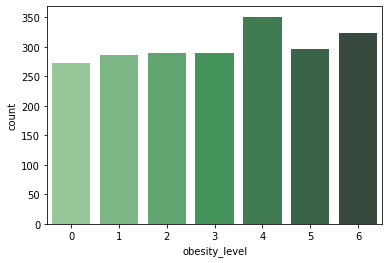

In [84]:
sns.countplot(data=data,
              x="obesity_level",
              palette="Greens_d")

- Faitly uniform distribution, as expected from the synthetic data balancing.

([<matplotlib.axis.XTick at 0x169b37e50>,
 [Text(0, 0, '0'),
  Text(50, 0, '50'),
  Text(100, 0, '100'),
  Text(150, 0, '150')])

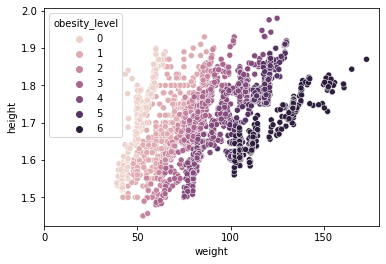

In [97]:
sns.scatterplot(data = data,
              x="weight",
              y="height",
              hue='obesity_level')
plt.xticks([0, 50, 100, 150], ['0', '50', '100', '150'])

- Fairly linear relationships here. A number of planes could be introduced to split these data points into obesity levels fairly accurately, which would suggest logistic regression would work well.

([<matplotlib.axis.XTick at 0x15d5bb4c0>,
 [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

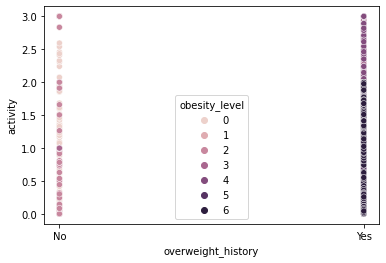

In [101]:
sns.scatterplot(data = data,
              x="overweight_history",
              y="activity",
              hue='obesity_level')
plt.xticks([0, 1], ['No','Yes'])

- Overweight_history is clearly a significant factor in obesity levels. Logistic regression is starting to look less appealing.

<AxesSubplot:xlabel='high_caloric_food', ylabel='monitor_cals'>

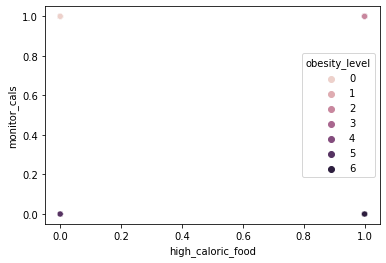

In [106]:
sns.scatterplot(data = data,
              x="high_caloric_food",
              y="monitor_cals",
              hue='obesity_level')
#plt.xticks([0, 1], ['No','Yes'])

<AxesSubplot:xlabel='num_meals', ylabel='vegitables'>

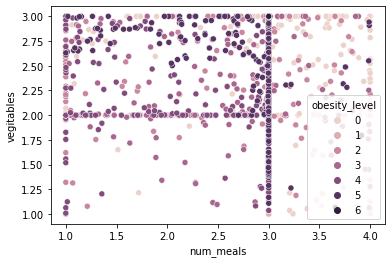

In [107]:
sns.scatterplot(data = data,
              x="num_meals",
              y="vegitables",
              hue='obesity_level')

- The first plot makes me think logistic regression is worth trying, but the lack of linear relationshps in the later plots make me think that KNN or tree based models will be better sutied to this data.

##### Some final thoughs on the dataset:
- My expectation that eating more between meals would correlate to higher levels of obesity is likely influenced by my experience with unhealthy snacking in America, and has less basis in the hispanic cultures which this survey was centered around. After a little research, I confirmed that the unhealthy artificial foods I associate with 'snacks' are less commonly eaten between meals in the countries of interest. Furthermore, eating between meals could also lead to eating less during meals, which is actually healthier than only eating three large meals oer day. This survey did not ask how much food is consumed during a meal, so there is no way of knowing if this is the case, but at least there are some possible explanations for the relationship between snacking and obesity levels.
- Another relationship which initially surprised me was the relationship between screen time and obesity levels. In America, high screen time levels might be associated with a sedentary lifestyle; however, the countries of interest in this survey have a much higher poverty rate, so high screen time levels might be an indicator of wealth, which would be logically be associated with greater access to nutritional food, and therefore lower obesity levels.

### ML Approach
It would be useful to have an intepretable model to gain insights into which factors contribute significantly to obesity, so regression models or trees based models will be the best options.

#### multiclass logistic regresion model

In [111]:
X = data.drop(columns = ['obesity_level'])
y = data.obesity_level

In [112]:
#standardize data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X.loc[:,:] = sc.fit_transform(X)

In [114]:
#train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [133]:
#initialize model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

LR = LogisticRegression(max_iter = 4000, multi_class = 'multinomial')

In [137]:
#grid search
grid_values = {
    'penalty':['l1', 'l2'],
    'solver':['newton-cg', 'sag', 'saga', 'lbfgs'],
    'tol':[1e-3, 1e-4, 1e-5]
}
LR_gridsearch = GridSearchCV(LR, param_grid = grid_values, scoring = 'accuracy', cv=5)
LR_gridsearch.fit(X_train, y_train.values.ravel())

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=4000,
                                          multi_class='multinomial'),
             param_grid={'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'sag', 'saga', 'lbfgs'],
                         'tol': [0.001, 0.0001, 1e-05]},
             scoring='accuracy')

In [138]:
#results
pd.DataFrame(LR_gridsearch.cv_results_).sort_values(by='rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_penalty,param_solver,param_tol,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
8,3.952204,0.276354,0.001381,0.000091,l1,saga,0.00001,"{'penalty': 'l1', 'solver': 'saga', 'tol': 1e-05}",0.935811,0.949324,0.905085,0.959322,0.949153,0.939739,0.018870,1
7,2.613638,0.031375,0.001327,0.000092,l1,saga,0.0001,"{'penalty': 'l1', 'solver': 'saga', 'tol': 0.0...",0.935811,0.949324,0.901695,0.955932,0.949153,0.938383,0.019475,2
6,0.411934,0.012389,0.001193,0.000029,l1,saga,0.001,"{'penalty': 'l1', 'solver': 'saga', 'tol': 0.001}",0.902027,0.922297,0.877966,0.901695,0.915254,0.903848,0.015155,3
23,0.049064,0.001522,0.001538,0.000234,l2,lbfgs,0.00001,"{'penalty': 'l2', 'solver': 'lbfgs', 'tol': 1e...",0.858108,0.868243,0.823729,0.864407,0.864407,0.855779,0.016352,4
21,0.036188,0.001225,0.000935,0.000027,l2,lbfgs,0.001,"{'penalty': 'l2', 'solver': 'lbfgs', 'tol': 0....",0.858108,0.868243,0.823729,0.864407,0.864407,0.855779,0.016352,4


In [140]:
#refit on entire training set
LR = LogisticRegression(max_iter=4000, multi_class='multinomial', penalty='l1', solver='saga', tol=1e-5)
LR.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(max_iter=4000, multi_class='multinomial', penalty='l1',
                   solver='saga', tol=1e-05)

In [144]:
print('Train Accuracy Score: ', LR.score(X_train, y_train))
print('Test Accuracy Score: ', LR.score(X_test, y_test))

Train Accuracy Score:  0.96614759647935
Test Accuracy Score:  0.9495268138801262


In [158]:
#coefficient analysis
coefficients = pd.DataFrame(LR.coef_)
coefficients.columns = X_train.columns
coefficients

cm = sns.light_palette("green", as_cmap=True)
coefficients

,gender,age,height,weight,overweight_history,high_caloric_food,vegitables,num_meals,snacks,smoke,water,monitor_cals,activity,screen_time,alcohol,Automobile,Bike,Motorbike,Public_Transportation,Walking
0,0.000000,0.000000,10.767443,-41.528300,-0.182401,0.000000,0.357021,0.018461,0.708823,-0.433941,0.315774,0.048651,0.023207,0.012403,0.162980,0.512844,-0.116153,-0.147265,0.000000,0.000000
1,-0.348924,-0.490592,6.826138,-24.609591,-0.103919,-0.175551,0.000000,0.000000,0.546231,0.149742,-0.046910,-0.128289,0.191323,-0.049126,-0.090989,0.000000,0.029389,0.128681,-0.171743,0.016577
2,0.111712,-0.406552,3.241954,-11.209553,0.000000,0.223099,-0.122131,0.077145,0.000000,-0.131481,0.000000,0.117391,0.000000,0.000000,0.104508,0.184538,0.109396,-0.144553,-0.003460,0.000000
3,-0.251290,0.369220,0.000000,0.000000,0.687245,-0.371572,0.000000,-0.214022,0.120089,0.000000,0.000000,0.120168,-0.054176,0.310971,-0.124161,0.000000,0.000000,0.000000,0.193176,-0.173502
4,0.699309,0.000000,-4.079961,12.751586,0.523638,0.167793,-0.262741,-0.203543,-0.029001,0.059462,0.156337,0.000000,0.099237,0.097879,0.000000,0.000000,0.000000,0.114996,0.000000,-0.026185
5,-0.089051,1.732294,-7.247152,25.612165,0.000000,0.000000,-0.335338,0.000000,0.000000,0.098366,-0.431666,-0.145710,-0.367549,-0.165246,-0.649531,-0.624248,0.000000,0.000000,0.000000,0.000000
6,5.901838,0.000000,-5.815357,26.428263,0.081778,0.968278,0.793312,1.377634,0.000000,0.000000,0.000000,0.000000,-0.554982,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


- The coefficients on the height and weight columns clearly have the greatest magnitude and so the greatest impact on the predictions, which is not surprising. But let's take a look at the other factors more in depth.

In [166]:
coefficients.drop(columns = ['height','weight']).style.background_gradient(axis=None, vmin = -.3, vmax = 1)

,gender,age,overweight_history,high_caloric_food,vegitables,num_meals,snacks,smoke,water,monitor_cals,activity,screen_time,alcohol,Automobile,Bike,Motorbike,Public_Transportation,Walking
0,0.000000,0.000000,-0.182401,0.000000,0.357021,0.018461,0.708823,-0.433941,0.315774,0.048651,0.023207,0.012403,0.162980,0.512844,-0.116153,-0.147265,0.000000,0.000000
1,-0.348924,-0.490592,-0.103919,-0.175551,0.000000,0.000000,0.546231,0.149742,-0.046910,-0.128289,0.191323,-0.049126,-0.090989,0.000000,0.029389,0.128681,-0.171743,0.016577
2,0.111712,-0.406552,0.000000,0.223099,-0.122131,0.077145,0.000000,-0.131481,0.000000,0.117391,0.000000,0.000000,0.104508,0.184538,0.109396,-0.144553,-0.003460,0.000000
3,-0.251290,0.369220,0.687245,-0.371572,0.000000,-0.214022,0.120089,0.000000,0.000000,0.120168,-0.054176,0.310971,-0.124161,0.000000,0.000000,0.000000,0.193176,-0.173502
4,0.699309,0.000000,0.523638,0.167793,-0.262741,-0.203543,-0.029001,0.059462,0.156337,0.000000,0.099237,0.097879,0.000000,0.000000,0.000000,0.114996,0.000000,-0.026185
5,-0.089051,1.732294,0.000000,0.000000,-0.335338,0.000000,0.000000,0.098366,-0.431666,-0.145710,-0.367549,-0.165246,-0.649531,-0.624248,0.000000,0.000000,0.000000,0.000000
6,5.901838,0.000000,0.081778,0.968278,0.793312,1.377634,0.000000,0.000000,0.000000,0.000000,-0.554982,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Some notable observations:
- Some of the strongest coefficients are in the obesity_III predictor (index 6), and are mostly what you would expect: eating high caloric food, eating many meals and not excercising increase the likelihood of being catagorized as obesity_III. It is surpirsing, though, that being female is also a very strong predictor of obesity_III.
- A family history of obesity detracts from the probability of falling into the normal weight and underweight catagories, and increases probability of flalling into the overweight_II and obesity_I catagories. My intepretation of this is that genetics predispose a person to weight issues, but severe overweight issues (obesity_II and obesity_III) generally result from lifestyle choices.
- Interstingly, frequently eating vegitables has either no effect or decreases the probability of all obesity levels except underweight and obesity_III, the two polar opposite weight groups. I'll leave that to the social scientist to figure out.

All more could be drawn out of this information given a direction or a specifc topic of interest.

#### Gradient Boosted Classifier

In [181]:
#redoing train test split without normalization
X = data.drop(columns = ['obesity_level'])
y = data.obesity_level

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [182]:
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier()

#grid search
grid_values = {
    'learning_rate':[.01, .1],
    'n_estimators':[100, 200, 500],
    'max_depth':[1, 3, 5, 7]
}
GBC_gridsearch = GridSearchCV(GBC, param_grid = grid_values, scoring = 'accuracy', cv=5)
GBC_gridsearch.fit(X_train, y_train.values.ravel())

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1],
                         'max_depth': [1, 3, 5, 7],
                         'n_estimators': [100, 200, 500]},
             scoring='accuracy')

In [183]:
#results
pd.DataFrame(GBC_gridsearch.cv_results_).sort_values(by='rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
20,5.869488,0.288365,0.012633,0.000461,0.1,5,500,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",0.959459,0.949324,0.966102,0.986441,0.966102,0.965486,0.012144,1
16,2.706084,0.019909,0.007142,0.000906,0.1,3,200,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",0.949324,0.952703,0.955932,0.983051,0.969492,0.962100,0.012515,2
19,4.194694,0.029705,0.010270,0.000230,0.1,5,200,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",0.956081,0.945946,0.962712,0.983051,0.955932,0.960744,0.012372,3
23,5.652783,0.136634,0.012770,0.000234,0.1,7,500,"{'learning_rate': 0.1, 'max_depth': 7, 'n_esti...",0.956081,0.932432,0.969492,0.986441,0.955932,0.960076,0.017782,4
17,6.396196,0.044244,0.013508,0.000161,0.1,3,500,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",0.942568,0.949324,0.945763,0.986441,0.976271,0.960073,0.017801,5


In [184]:
#retrain on full train set
GBC = GradientBoostingClassifier(learning_rate=.1, max_depth=5, n_estimators=500)
GBC.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=5, n_estimators=500)

In [185]:
print('Train Score: ', GBC.score(X_train, y_train))
print('Test Score: ', GBC.score(X_test, y_test))

Train Score:  1.0
Test Score:  0.9747634069400631


- Solid 2.5% boost in accuracy compared to the logistic regression

#### Random Forest Classifier

In [187]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier()

#grid search
grid_values = {
    'criterion':['gini', 'log_loss'],
    'n_estimators':[75, 100, 200, 500, 1000]
}
RFC_gridsearch = GridSearchCV(RFC, param_grid = grid_values, scoring = 'accuracy', cv=5)
RFC_gridsearch.fit(X_train, y_train.values.ravel())

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'log_loss'],
                         'n_estimators': [75, 100, 200, 500, 1000]},
             scoring='accuracy')

In [188]:
#results
pd.DataFrame(RFC_gridsearch.cv_results_).sort_values(by='rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
9,2.281996,0.054802,0.123044,0.009527,log_loss,1000,"{'criterion': 'log_loss', 'n_estimators': 1000}",0.929054,0.932432,0.942373,0.966102,0.969492,0.947891,0.016867,1
8,1.125592,0.024122,0.061698,0.005494,log_loss,500,"{'criterion': 'log_loss', 'n_estimators': 500}",0.929054,0.935811,0.938983,0.962712,0.966102,0.946532,0.014981,2
2,0.383606,0.023301,0.026529,0.003843,gini,200,"{'criterion': 'gini', 'n_estimators': 200}",0.922297,0.932432,0.942373,0.969492,0.959322,0.945183,0.017234,3
7,0.439493,0.012651,0.024644,0.001776,log_loss,200,"{'criterion': 'log_loss', 'n_estimators': 200}",0.932432,0.932432,0.938983,0.955932,0.966102,0.945176,0.013541,4
4,1.794911,0.059842,0.130865,0.012025,gini,1000,"{'criterion': 'gini', 'n_estimators': 1000}",0.922297,0.932432,0.938983,0.962712,0.966102,0.944505,0.017131,5


In [189]:
#retrain on full train set
RFC = RandomForestClassifier(criterion='log_loss', n_estimators=1000)
RFC.fit(X_train, y_train)

RandomForestClassifier(criterion='log_loss', n_estimators=1000)

In [190]:
print('Train Score: ', RFC.score(X_train, y_train))
print('Test Score: ', RFC.score(X_test, y_test))

Train Score:  1.0
Test Score:  0.9589905362776026


- Slightly better than the logistic regression model, but not quite as good as the boosting model.

#### KNN

In [195]:
#standardize data again
X = data.drop(columns = ['obesity_level'])
y = data.obesity_level

X.loc[:,:] = sc.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [196]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()

#grid search
grid_values = {
    'n_neighbors':[1, 3, 5, 7, 10, 15, 20]
}
KNN_gridsearch = GridSearchCV(KNN, param_grid = grid_values, scoring = 'accuracy', cv=5)
KNN_gridsearch.fit(X_train, y_train.values.ravel())

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 10, 15, 20]},
             scoring='accuracy')

In [197]:
#results
pd.DataFrame(KNN_gridsearch.cv_results_).sort_values(by='rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002045,0.000186,0.014579,0.001818,1,{'n_neighbors': 1},0.814189,0.820946,0.800000,0.864407,0.837288,0.827366,0.022065,1
1,0.002157,0.000312,0.014339,0.001112,3,{'n_neighbors': 3},0.787162,0.790541,0.783051,0.833898,0.806780,0.800286,0.018634,2
2,0.002216,0.000112,0.015572,0.000443,5,{'n_neighbors': 5},0.780405,0.783784,0.759322,0.810169,0.823729,0.791482,0.022827,3
3,0.001711,0.000093,0.011858,0.000194,7,{'n_neighbors': 7},0.766892,0.783784,0.752542,0.779661,0.816949,0.779966,0.021473,4
4,0.001542,0.000031,0.011706,0.000141,10,{'n_neighbors': 10},0.753378,0.770270,0.745763,0.745763,0.813559,0.765747,0.025527,5


In [198]:
#retrain on full train set
KNN = KNeighborsClassifier(n_neighbors=1)
KNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [199]:
print('Train Score: ', KNN.score(X_train, y_train))
print('Test Score: ', KNN.score(X_test, y_test))

Train Score:  1.0
Test Score:  0.8438485804416404


- K nearest neighbors is clearly not a good apporach for this dataset

---
- An ensemble of the tree models and the logistic regression model might increase the accuracy slightly, but the logistic regression models requires the data be scaled and the tree models do not, and given that the models are already quite accurate, I don't think it's worth the trickery to make an ensemble.
- In the end, this little project could be used predict obesity levels from the given features to a high accuracy and to draw some interesting insights from the logistic regression model.